In [0]:
print("Hii")

Hii


In [0]:
#data

# Move the file from Workspace to DBFS
dbutils.fs.cp("file:/Workspace/Shared/data.csv","dbfs:/FileStore/data.csv")

True

In [0]:
# Load the file from DBFS
df = spark.read.format("csv").option("header", "true").load("/FileStore/data.csv")
df.show()

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
|2023-09-04|     UA|   ORD| ATL|       15|       20|
|2023-09-04|     DL|   LAX| SFO|       -5|      -10|
|2023-09-05|     AA|   LAX| JFK|       20|       25|
|2023-09-05|     UA|   DFW| ATL|        0|        0|
|2023-09-05|     DL|   JFK| LAX|       10|       15|
+----------+-------+------+----+---------+----

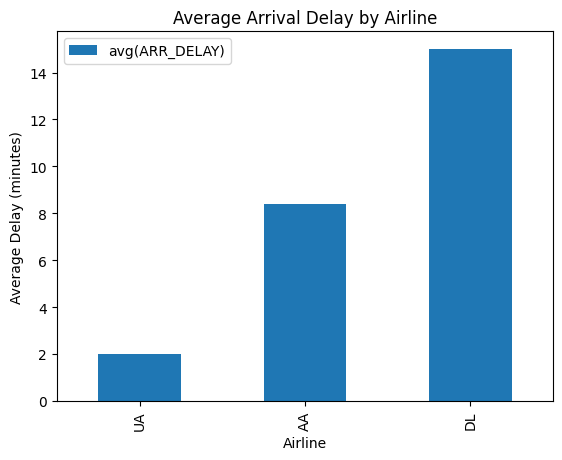

In [0]:
import matplotlib.pyplot as plt

#Convert to Pandas
df_pandas = df.groupBy("CARRIER").agg({"ARR_DELAY": "avg"}).toPandas()
#Plot using Matplotlib
df_pandas.plot(kind='bar', x='CARRIER', y="avg(ARR_DELAY)", legend=True)
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()

In [0]:
#sales_data

#move the file from workspace to dbfs
dbutils.fs.cp("file:/Workspace/Shared/sales_data.csv","dbfs:/FileStore/sales_data.csv")

True

In [0]:
#reading data from a csv file
df_csv = spark.read.csv("/FileStore/sales_data.csv", header=True
, inferSchema=True)
df_csv.show()

+----------+------+--------+--------+-----+
|      Date|Region| Product|Quantity|Price|
+----------+------+--------+--------+-----+
|2024-09-01| North|Widget A|      10| 25.5|
|2024-09-01| South|Widget B|       5|15.75|
|2024-09-02| North|Widget A|      12| 25.5|
|2024-09-02|  East|Widget C|       8| 22.5|
|2024-09-03|  West|Widget A|      15| 25.5|
|2024-09-03| South|Widget B|      20|15.75|
|2024-09-03|  East|Widget C|      10| 22.5|
|2024-09-04| North|Widget D|       7| 30.0|
|2024-09-04|  West|Widget B|       9|15.75|
+----------+------+--------+--------+-----+



In [0]:
#writing data to a csv file
df_csv.write.format("csv").option("header","true").save("/workspace/Shared/csv_output")

In [0]:
#create a SQL table from dataframe
df_csv.write.saveAsTable("sales_table")


In [0]:
#read the table using spark SQL
df_table = spark.read.table("sales_table")
df_table.show()

+----------+------+--------+--------+-----+
|      Date|Region| Product|Quantity|Price|
+----------+------+--------+--------+-----+
|2024-09-01| North|Widget A|      10| 25.5|
|2024-09-01| South|Widget B|       5|15.75|
|2024-09-02| North|Widget A|      12| 25.5|
|2024-09-02|  East|Widget C|       8| 22.5|
|2024-09-03|  West|Widget A|      15| 25.5|
|2024-09-03| South|Widget B|      20|15.75|
|2024-09-03|  East|Widget C|      10| 22.5|
|2024-09-04| North|Widget D|       7| 30.0|
|2024-09-04|  West|Widget B|       9|15.75|
+----------+------+--------+--------+-----+



In [0]:
#writing data to a delta table
df_csv.write.format("delta").mode("overwrite").save("/workspace/shared/delta_sales_data")

In [0]:
#readind data from a delta table
df_delta = spark.read.format("delta").load("/workspace/shared/delta_sales_data")
df_delta.show()

+----------+------+--------+--------+-----+
|      Date|Region| Product|Quantity|Price|
+----------+------+--------+--------+-----+
|2024-09-01| North|Widget A|      10| 25.5|
|2024-09-01| South|Widget B|       5|15.75|
|2024-09-02| North|Widget A|      12| 25.5|
|2024-09-02|  East|Widget C|       8| 22.5|
|2024-09-03|  West|Widget A|      15| 25.5|
|2024-09-03| South|Widget B|      20|15.75|
|2024-09-03|  East|Widget C|      10| 22.5|
|2024-09-04| North|Widget D|       7| 30.0|
|2024-09-04|  West|Widget B|       9|15.75|
+----------+------+--------+--------+-----+



In [0]:

# Query Delta Table with SQL
df_query = spark.sql("SELECT * FROM sales_table WHERE Quantity > 10")
df_query.show()

+----------+------+--------+--------+-----+
|      Date|Region| Product|Quantity|Price|
+----------+------+--------+--------+-----+
|2024-09-02| North|Widget A|      12| 25.5|
|2024-09-03|  West|Widget A|      15| 25.5|
|2024-09-03| South|Widget B|      20|15.75|
+----------+------+--------+--------+-----+

